In [50]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.tseries.offsets import MonthEnd

In [2]:
df = pd.read_csv('../data/airbnb_listings.csv')

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,177,https://www.airbnb.com/rooms/177,20220926045611,2022-09-26,city scrape,Tiny Home in the Heart of the City- ECO FRIENDLY,"160 sq ft + 80 sq ft loft for sleeping, Sleeps...","Quiet neighborhood next to park, creeks and bi...",https://a0.muscache.com/pictures/a1745ab2-b3a0...,615,...,4.94,4.85,4.78,2016-BFN-0004968,f,2,2,0,0,1.63
1,360,https://www.airbnb.com/rooms/360,20220926045611,2022-09-26,city scrape,Sit in the Peaceful Garden of the Chickadee Co...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,https://a0.muscache.com/pictures/monet/Select-...,666,...,5.00,5.00,4.91,2017-BFN-0002177,f,2,2,0,0,3.43
2,364,https://www.airbnb.com/rooms/364,20220926045611,2022-09-26,city scrape,Lodo / RiNo LOFT via airport train,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",https://a0.muscache.com/pictures/11766413/a2c5...,783,...,4.96,4.65,4.71,NaN,f,1,1,0,0,0.53
3,590,https://www.airbnb.com/rooms/590,20220926045611,2022-09-26,city scrape,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,https://a0.muscache.com/pictures/110931/30991c...,933,...,4.95,4.75,4.85,2021-BFN-0000578,f,2,0,2,0,4.08
4,592,https://www.airbnb.com/rooms/592,20220926045611,2022-09-26,previous scrape,private,This room is in the basement. It does not hav...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,933,...,4.94,4.80,4.86,2021-BFN-0000578,f,2,0,2,0,1.01


In [4]:
df.shape

(5836, 75)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5836 non-null   int64  
 1   listing_url                                   5836 non-null   object 
 2   scrape_id                                     5836 non-null   int64  
 3   last_scraped                                  5836 non-null   object 
 4   source                                        5836 non-null   object 
 5   name                                          5836 non-null   object 
 6   description                                   5808 non-null   object 
 7   neighborhood_overview                         4181 non-null   object 
 8   picture_url                                   5836 non-null   object 
 9   host_id                                       5836 non-null   i

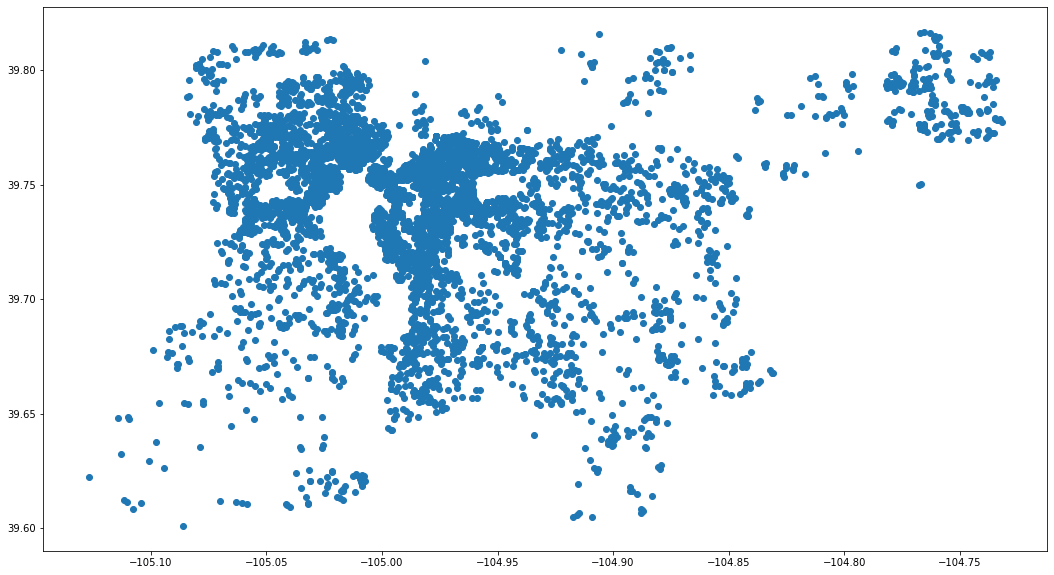

In [14]:
plt.figure(figsize = (18, 10))
plt.scatter(x = df['longitude'], y = df['latitude'])

plt.show();

In [62]:
dates = df[['host_since', 'first_review']]

In [63]:
dates.isnull().sum()

host_since        0
first_review    862
dtype: int64

In [64]:
# Creating a new date column based on the first_review date, populating it with the host_since date if null
dates['date'] = dates['first_review'].fillna(dates['host_since'])

/var/folders/lz/08gb56690psggb6cznf0xhwh0000gn/T/ipykernel_98587/3702995051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['date'] = dates['first_review'].fillna(dates['host_since'])


In [65]:
dates.drop(columns = ['host_since', 'first_review'], inplace = True)

/var/folders/lz/08gb56690psggb6cznf0xhwh0000gn/T/ipykernel_98587/17824320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates.drop(columns = ['host_since', 'first_review'], inplace = True)


In [66]:
# Convert dates to end of month to match zillow data
## Source:  https://stackoverflow.com/questions/37354105/find-the-end-of-the-month-of-a-pandas-dataframe-series
dates['date'] = pd.to_datetime(dates['date']) + MonthEnd(0)

/var/folders/lz/08gb56690psggb6cznf0xhwh0000gn/T/ipykernel_98587/208540710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['date'] = pd.to_datetime(dates['date']) + MonthEnd(0)


In [70]:
dates.sort_values('date', inplace = True)

/var/folders/lz/08gb56690psggb6cznf0xhwh0000gn/T/ipykernel_98587/4032149446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates.sort_values('date', inplace = True)


In [83]:
airbnb_pivot = dates.groupby(['date']).size().to_frame('listings_added')

In [84]:
airbnb_pivot['total_listings'] = airbnb_pivot.cumsum()
airbnb_pivot

,listings_added,total_listings
date,,
2009-02-28,1,1
2009-03-31,2,3
2009-05-31,1,4
2010-02-28,1,5
2010-04-30,1,6
...,...,...
2022-05-31,213,5000
2022-06-30,183,5183
2022-07-31,254,5437


In [87]:
airbnb_pivot[['total_listings']].to_csv('../data/airbnb_pivot.csv')

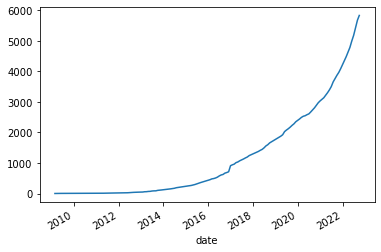

In [89]:
airbnb_pivot['total_listings'].plot();